# R laboratory 06
## Lorenzo Valentini

In [1]:
library(coda)
library(rjags)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

Warning message:
“package ‘rjags’ was built under R version 3.6.3”Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


## Exercise 1
    A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
    A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.
    (a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?
    (b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?
    (c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance
    (d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.
    (e) Perform the same hypothesis test in the classical frequentist way.

#### a)

The $y$ follows a binomial distribution. The test can either succeed or fail in detecting the disease for each patient.

#### b)

The frequentist estimator is the ratio between failures and trials: 6 / 75 = 8%.

#### c)

[1] "The frequentist estimator is 8%. The bayesian estimator is 8% with standard deviation of 3%."

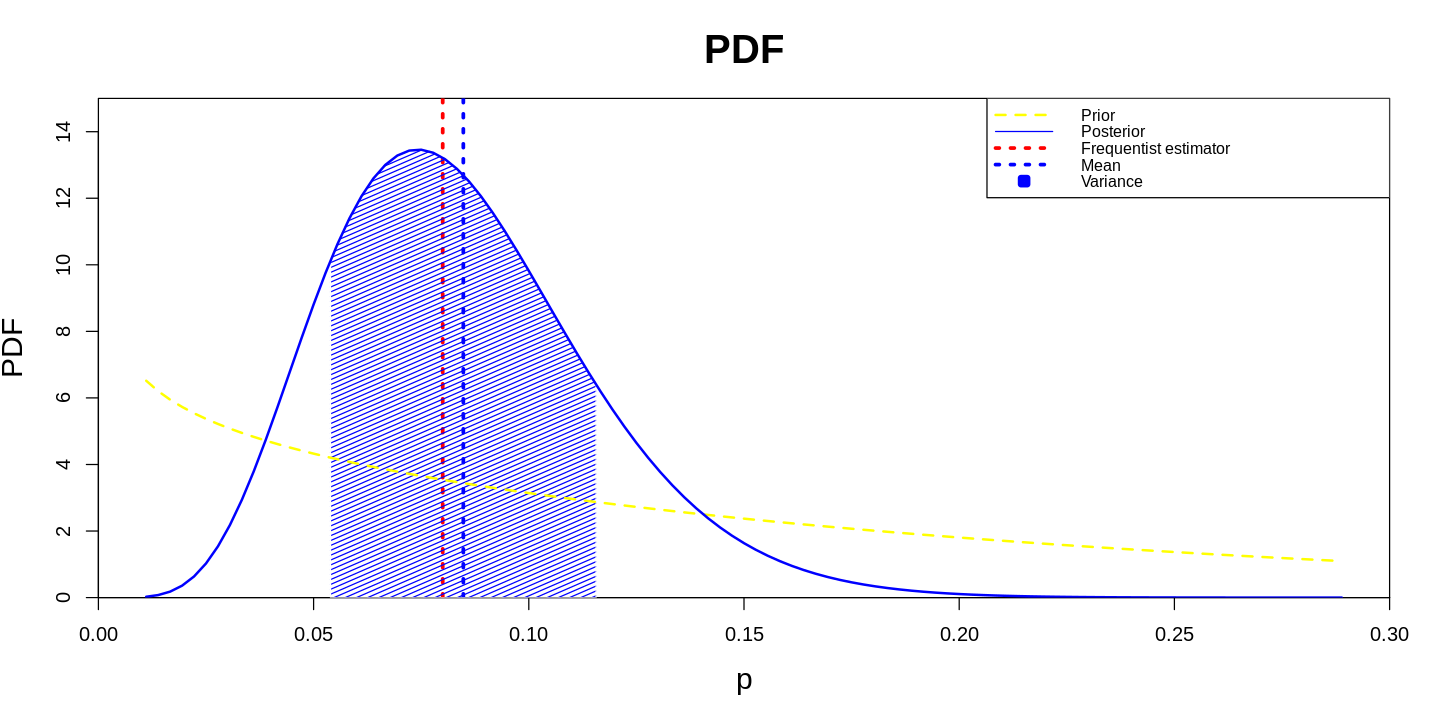

In [2]:
mean_prior <- 0.15
sigma_prior <- 0.14
alpha_prior <- (((1 - mean_prior) / (sigma_prior**2)) - (1 / mean_prior)) * mean_prior**2
beta_prior <- alpha_prior* ( (1 / mean_prior) - 1)

n <- 75
y <- 6

alpha_posterior <- alpha_prior + y
beta_posterior <- beta_prior + n - y
mean_posterior <- alpha_posterior / (alpha_posterior + beta_posterior)
sigma_posterior <- sqrt((alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior + 1) * (alpha_posterior + beta_posterior)**2))

frequentist_estimator <- 6 / 75

sigma_borders <- seq(mean_posterior - sigma_posterior, mean_posterior + sigma_posterior, len = 137)
prior <- function(p) {
    prior <- dbeta(p, alpha_prior, beta_prior)
    return(prior)
}
posterior <- function(p) {
    posterior <- dbeta(p, alpha_posterior, beta_posterior)
    return(posterior)
}

fig(12, 6)
plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.3), ylim = c(0,15), ylab = 'PDF', xlab = 'p', main = 'PDF',
        cex.lab = 1.5, cex.main = 2, col = 'navy', type = 'l', lty = 2, lwd = 3)
abline(v = mean_posterior, lty = 3, lwd = 3, col = 4)
abline(v = frequentist_estimator, lty = 3, lwd = 3, col = 2)
polygon(c(sigma_borders, mean_posterior + sigma_posterior, mean_posterior - sigma_posterior), density = 30,
        c(dbeta(sigma_borders, alpha_posterior, beta_posterior), 0, 0), col = 4, border = 0)
curve(prior(x), col = 7, lwd = 2, lty = 2, add = TRUE)
curve(posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Prior','Posterior','Frequentist estimator', 'Mean', "Variance"),
        col = c(7, 4, 2, 4, 4), lty = c(2, 1, 3, 3, NA), lwd = c(2, 1, 3, 3, 5),
        pch = c(NA, NA, NA, NA, 22), cex = .8)


sprintf('The frequentist estimator is %.0f%%. The bayesian estimator is %.0f%% with standard deviation of %.0f%%.', 
        100 * frequentist_estimator, 100 * mean_posterior, sigma_posterior * 100)


#### d)

From the graph it is evident that the p-value is over 5%, so it is not possible to affirm that p > 0.15 with a 0.95 confidence level.

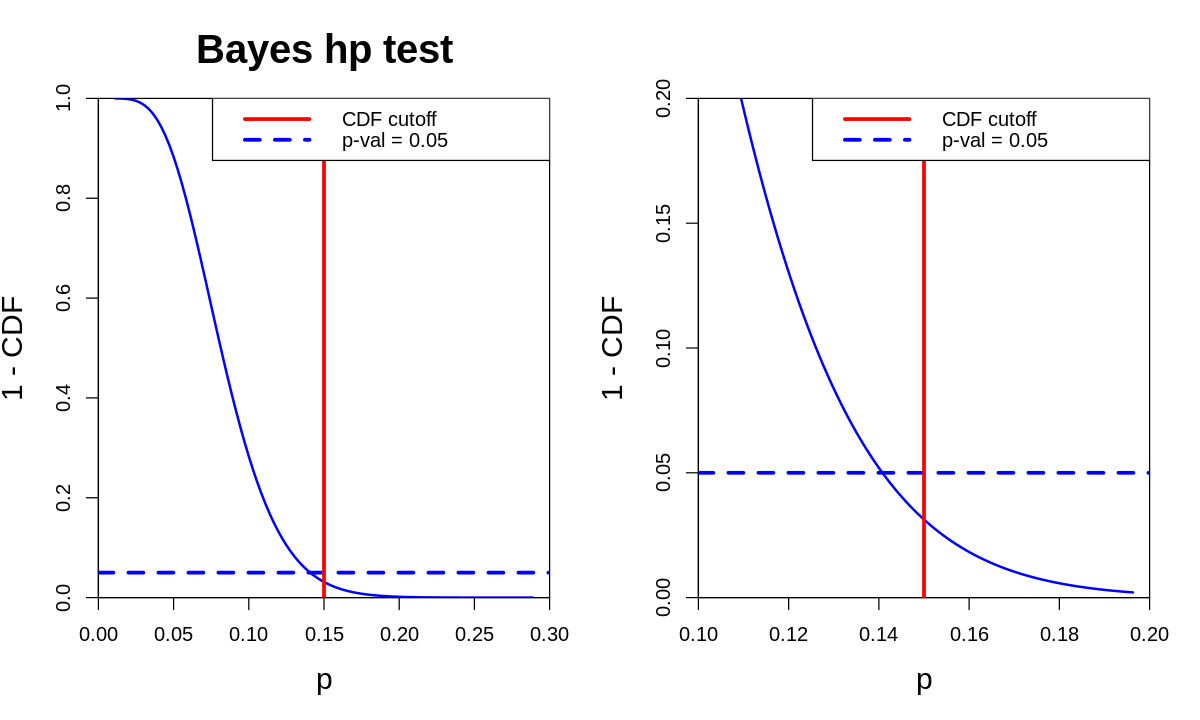

In [3]:
p <- 0.15
a <- 0.05
P_H_null <- 1 - pbeta(p, alpha_posterior, beta_posterior)
cdf_posterior <- function(p) {
    prior <- pbeta(p, alpha_posterior, beta_posterior)
    return(prior)
}

fig(10, 6)
par(mfrow = c(1,2))

plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.3), ylim = c(0,1), ylab = '1 - CDF',
     xlab = 'p', main = "Bayes hp test", cex.lab = 1.5, cex.main = 2, ,type = 'l', lty = 1, lwd = 3)
curve(1 - cdf_posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
abline(h = a, lwd = 3, lty = 2, col = 4)
abline(v = p, lwd = 3, lty = 1, col = 2)
legend('topright', c('CDF cutoff', "p-val = 0.05"), lty = c(1, 2), lwd = c(3, 3), col = c(2, 4))

plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0.1, 0.2), ylim = c(0, 0.2), ylab = "1 - CDF",
     xlab = 'p', main = "", cex.lab = 1.5, cex.main = 2, ,type = 'l', lty = 1, lwd = 3)
curve(1 - cdf_posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
abline(h = a, lwd = 3, lty = 2, col = 4)
abline(v = p, lwd = 3, lty = 1, col = 2)
legend('topright', c('CDF cutoff', "p-val = 0.05"), lty = c(1, 2), lwd = c(3, 3), col = c(2, 4))

cat("From the graph it is evident that the p-value is over 5%, so it is not possible to affirm that p > 0.15 with a 0.95 confidence level.")

#### e)

In [4]:
binom.test(6, 75, 0.15, alternative = 'less')
cat("The p-value is over 5%, so it is not possible to affirm that p > 0.15 with a 0.95 confidence level.")


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


The p-value is over 5%, so it is not possible to affirm that p > 0.15 with a 0.95 confidence level.

## Exercise 2
    Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
    Considering the following to sets of observations taken over a fixed large time interval in two different corps:
    y death soldiers    0   1   2   3   4   ≥5
    n 1 observations    109 65  22  3   1   0
    n 2 observations    144 91  32  11  2   0
    (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.
    (b) assuming now a Jeffreys’ prior, g(λ) ∝ 1/ √λ , with λ > 0, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


Uniform Prior - N1, mean, median and variance:	  0.615, 0.613, 0.003
Uniform Prior - N2, mean, median and variance:	  0.704, 0.702, 0.003
95% CI for Uniform Prior - N1:	  [0.511, 0.728]
95% CI for Uniform Prior - N1:	  [0.609, 0.805]

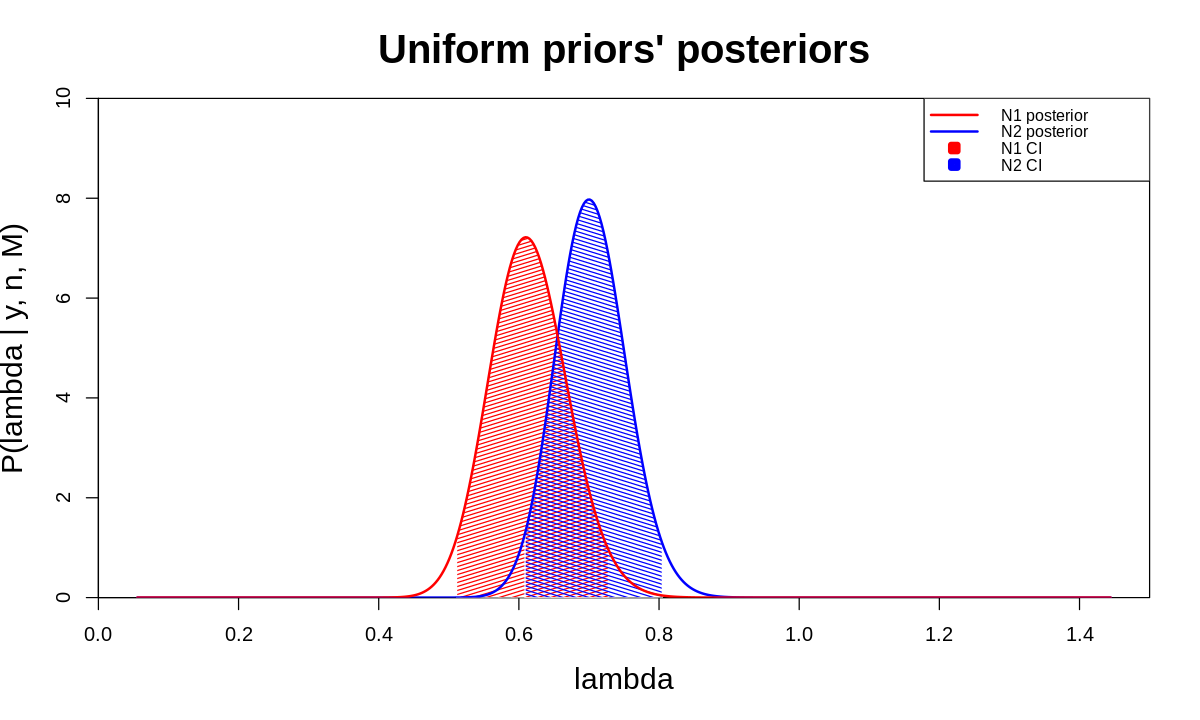

In [5]:
count <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

pois_posterior <- function(x, shape, rate){
        dgamma(x, shape, rate)
}

shape1 <- sum(n1 * count) + 1
rate1 <- sum(n1)
shape2 <- sum(n2 * count) + 1
rate2 <- sum(n2)

mean1 <- shape1 / rate1
mean2 <- shape2 / rate2
median1 <- qgamma(0.5, shape1, rate1)
median2 <- qgamma(0.5, shape2, rate2)
var1 <- shape1 / rate1**2
var2 <- shape2 / rate2**2

left1 <- qgamma(0.025, shape1, rate1)
right1 <- qgamma(0.975, shape1, rate1)
left2 <- qgamma(0.025, shape2, rate2)
right2 <- qgamma(0.975, shape2, rate2)

cat("\nUniform Prior - N1, mean, median and variance:\t ", sprintf("%.3f, %.3f, %.3f", mean1, median1, var1))
cat("\nUniform Prior - N2, mean, median and variance:\t ", sprintf("%.3f, %.3f, %.3f", mean2, median2, var2))
cat("\n95% CI for Uniform Prior - N1:\t ", sprintf("[%.3f, %.3f]", qgamma(0.025,shape1, rate1), qgamma(0.975,shape1, rate1)))
cat("\n95% CI for Uniform Prior - N1:\t ", sprintf("[%.3f, %.3f]", qgamma(0.025,shape2, rate2), qgamma(0.975,shape2, rate2)))

x1 <- seq(left1, right1, 0.001)
x2 <- seq(left2, right2, 0.001)
y1 <- pois_posterior(x1, shape1, rate1)
y2 <- pois_posterior(x2, shape2, rate2)
plot(0, 0, xaxs = 'i', yaxs = 'i', ylab = "P(lambda | y, n, M)", xlim = c(0, 1.5), ylim = c(0,10),
     xlab = 'lambda', main = "Uniform priors' posteriors", cex.lab = 1.5, cex.main = 2,type = 'l', lty = 1, lwd = 3)
polygon(c(x1, rev(x1)), density = 30, c(y1, 0 * x1), col = 2, angle = 30, lty = 1, border = 0)
polygon(c(x2, rev(x2)), density = 30, c(y2, 0 * x2), col = 4, angle = -30, lty = 1, border = 0)
curve(pois_posterior(x, shape2,rate2), n = 500, col = 4, lwd = 2, lty = 1, add = TRUE)
curve(pois_posterior(x, shape1,rate1), n = 500, col = 2, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('N1 posterior','N2 posterior','N1 CI', "N2 CI"),
        col = c(2, 4, 2, 4), lty = c(1, 1, NA, NA), lwd = c(2, 2, 5, 5),
        pch = c(NA, NA, 22, 22), cex = .8)


Jeffrey Prior - N1, mean, median and variance:	  0.613, 0.611, 0.003
Jeffrey Prior - N2, mean, median and variance:	  0.702, 0.701, 0.003
95% CI for Jeffrey Prior - N1:	  [0.509, 0.726]
95% CI for Jeffrey Prior - N1:	  [0.607, 0.803]

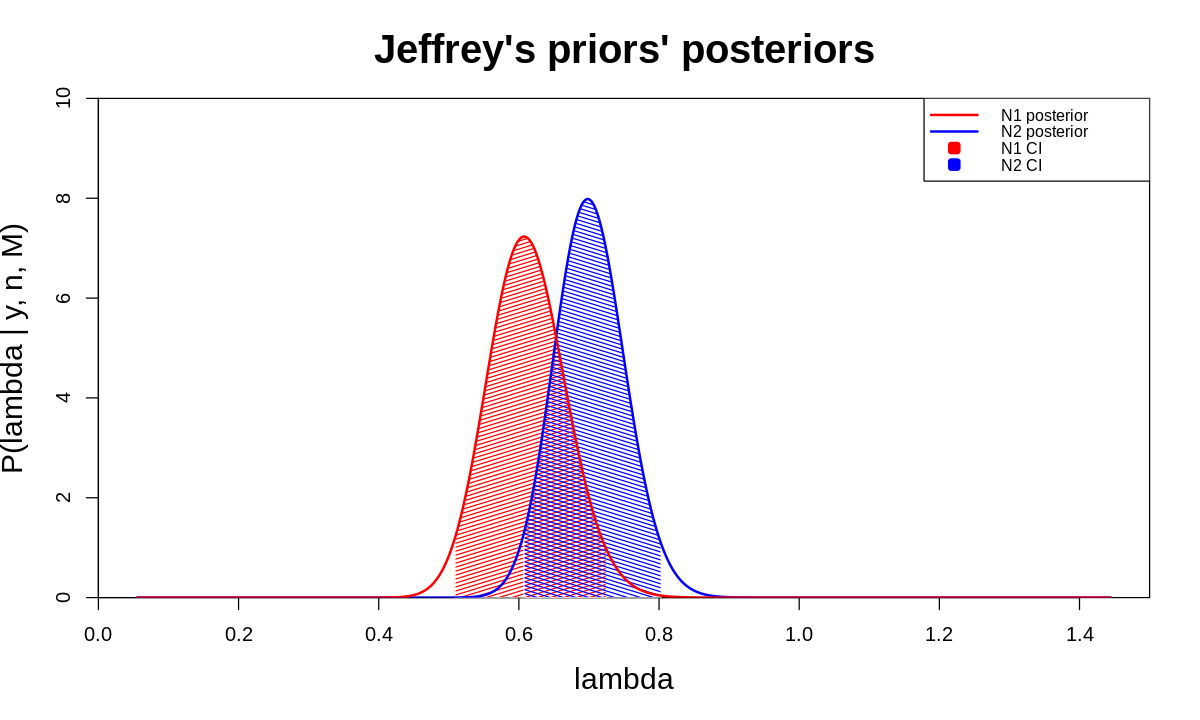

In [6]:
shape1 <- sum(n1 * count) + 0.5
rate1 <- sum(n1)
shape2 <- sum(n2 * count) + 0.5
rate2 <- sum(n2)

mean1 <- shape1 / rate1
mean2 <- shape2 / rate2
median1 <- qgamma(0.5, shape1, rate1)
median2 <- qgamma(0.5, shape2, rate2)
var1 <- shape1 / rate1**2
var2 <- shape2 / rate2**2

left1 <- qgamma(0.025, shape1, rate1)
right1 <- qgamma(0.975, shape1, rate1)
left2 <- qgamma(0.025, shape2, rate2)
right2 <- qgamma(0.975, shape2, rate2)

cat("\nJeffrey Prior - N1, mean, median and variance:\t ", sprintf("%.3f, %.3f, %.3f", mean1, median1, var1))
cat("\nJeffrey Prior - N2, mean, median and variance:\t ", sprintf("%.3f, %.3f, %.3f", mean2, median2, var2))
cat("\n95% CI for Jeffrey Prior - N1:\t ", sprintf("[%.3f, %.3f]", qgamma(0.025,shape1, rate1), qgamma(0.975,shape1, rate1)))
cat("\n95% CI for Jeffrey Prior - N1:\t ", sprintf("[%.3f, %.3f]", qgamma(0.025,shape2, rate2), qgamma(0.975,shape2, rate2)))

x1 <- seq(left1, right1, 0.001)
x2 <- seq(left2, right2, 0.001)
y1 <- pois_posterior(x1, shape1, rate1)
y2 <- pois_posterior(x2, shape2, rate2)
plot(0, 0, xaxs = 'i', yaxs = 'i', ylab = "P(lambda | y, n, M)", xlim = c(0, 1.5), ylim = c(0,10),
     xlab = 'lambda', main = "Jeffrey's priors' posteriors", cex.lab = 1.5, cex.main = 2, ,type = 'l', lty = 1, lwd = 3)
polygon(c(x1, rev(x1)), density = 30, c(y1, 0 * x1), col = 2, angle = 30, lty = 1, border = 0)
polygon(c(x2, rev(x2)), density = 30, c(y2, 0 * x2), col = 4, angle = -30, lty = 1, border = 0)
curve(pois_posterior(x, shape2, rate2), col = 4, n = 500, lwd = 2, lty = 1, add = TRUE)
curve(pois_posterior(x, shape1, rate1), col = 2, n = 500, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('N1 posterior','N2 posterior','N1 CI', "N2 CI"),
        col = c(2, 4, 2, 4), lty = c(1, 1, NA, NA), lwd = c(2, 2, 5, 5),
        pch = c(NA, NA, 22, 22), cex = .8)


## Exercise 3
    A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
    Indicating with p the probability that a sample of water taken from the stream has a high bacter X level,
    (a) find the frequentist estimator for p
    (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P (p|y)
    (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
    (d) test the hypotesis H0 : p = 0.1 versus H1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach
    A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacterX level
    (e) find the frequentist estimator for p
    (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.
    (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
    (h) test the hypotesis H0 : p = 0.1 versus H1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach

#### a)

The study treats a binomial probability distribution. The frequentist estimator is  $y / n = 11 / 116 = 9.5$%.

#### b)

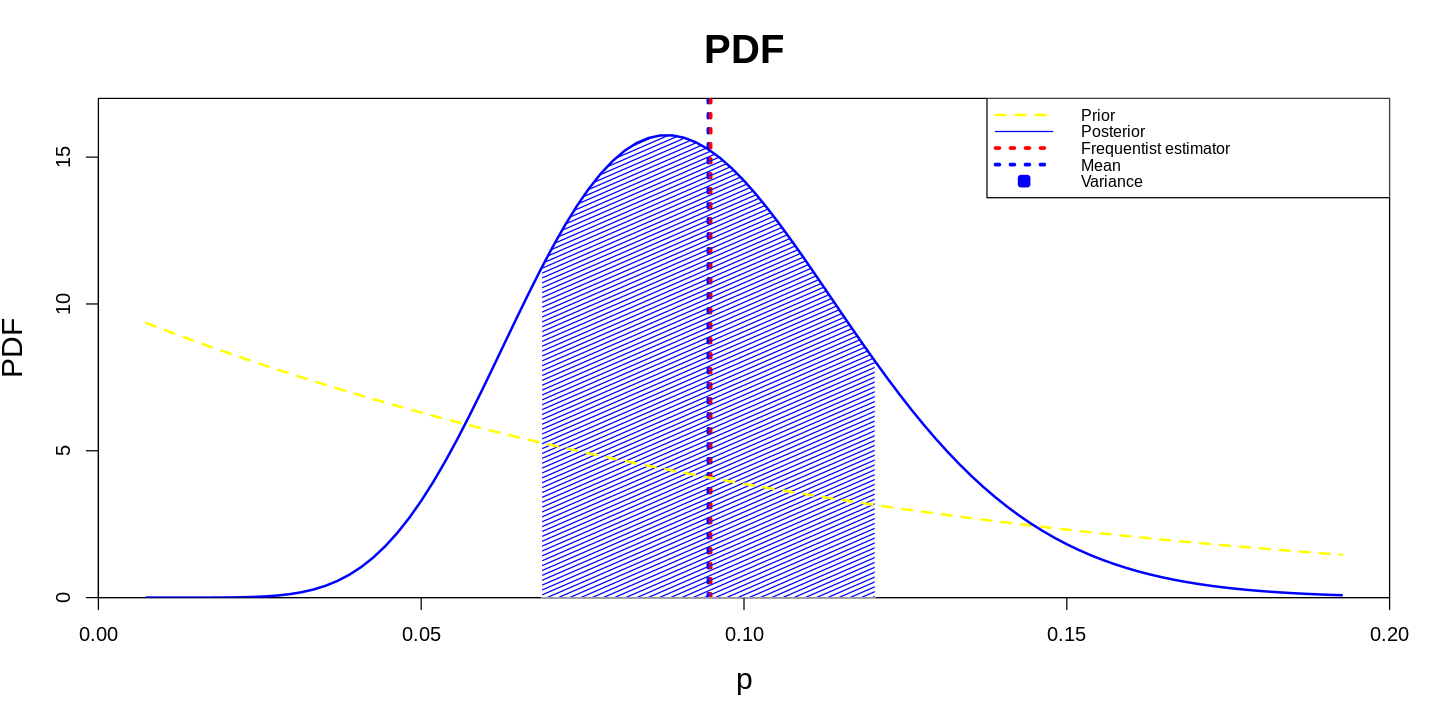

In [7]:
# Computing the posterior from the prior and the experimental results
alpha_prior <- 1
beta_prior <- 10
n <- 116
y <- 11
alpha_posterior <- alpha_prior + y
beta_posterior <- beta_prior + n - y
mean_posterior <- alpha_posterior / (alpha_posterior + beta_posterior)
sigma_posterior <- sqrt((alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior + 1) * (alpha_posterior + beta_posterior)**2))

#Frequentist estimator
frequentist_estimator = y / n



prior <- function(p) {
    prior <- dbeta(p,alpha_prior,beta_prior)
    return(prior)
}
posterior <- function(p) {
    posterior <- dbeta(p,alpha_posterior,beta_posterior)
    return(posterior)
}
borders = seq(mean_posterior - sigma_posterior, mean_posterior + sigma_posterior, len=116)
fig(12,6)
plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.2), ylim = c(0,17), ylab = 'PDF', xlab = 'p', main = 'PDF',
        cex.lab = 1.5, cex.main = 2, col = 3, type = 'l', lty = 2, lwd = 3)
abline(v = mean_posterior, lty = 3, lwd = 3, col = 4)
abline(v = frequentist_estimator, lty = 3, lwd = 3, col = 2)
polygon(c(borders, mean_posterior + sigma_posterior, mean_posterior - sigma_posterior), density = 30,
        c(dbeta(borders, alpha_posterior, beta_posterior), 0, 0), col = 4, border = 0)
curve(prior(x), col = 7, lwd = 2, lty = 2, add = TRUE)
curve(posterior(x), col = 4, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Prior','Posterior','Frequentist estimator', 'Mean', "Variance"),
        col = c(7, 4, 2, 4, 4), lty = c(2, 1, 3, 3, NA), lwd = c(2, 1, 3, 3, 5),
        pch = c(NA, NA, NA, NA, 22), cex = .8)


### c)

In [8]:
# Credibility interval
CI_left <- qbeta(0.025, alpha_posterior, beta_posterior)
CI_right <- qbeta(0.975, alpha_posterior, beta_posterior)
cat(sprintf('Bayesian estimator:\t%.0f%%\t\t sigma:\t%.0f%%\nCredibility interval:\t[%.0f%%, %.0f%%]',100*mean_posterior, sigma_posterior*100, CI_left*100,CI_right*100))

Bayesian estimator:	9%		 sigma:	3%
Credibility interval:	[5%, 15%]

### d)

Considering a 2 tail test, it appears that p = 0.1 is inside the 95% credibility interval. 
The null hypothesis can not be rejected at this level of significance.

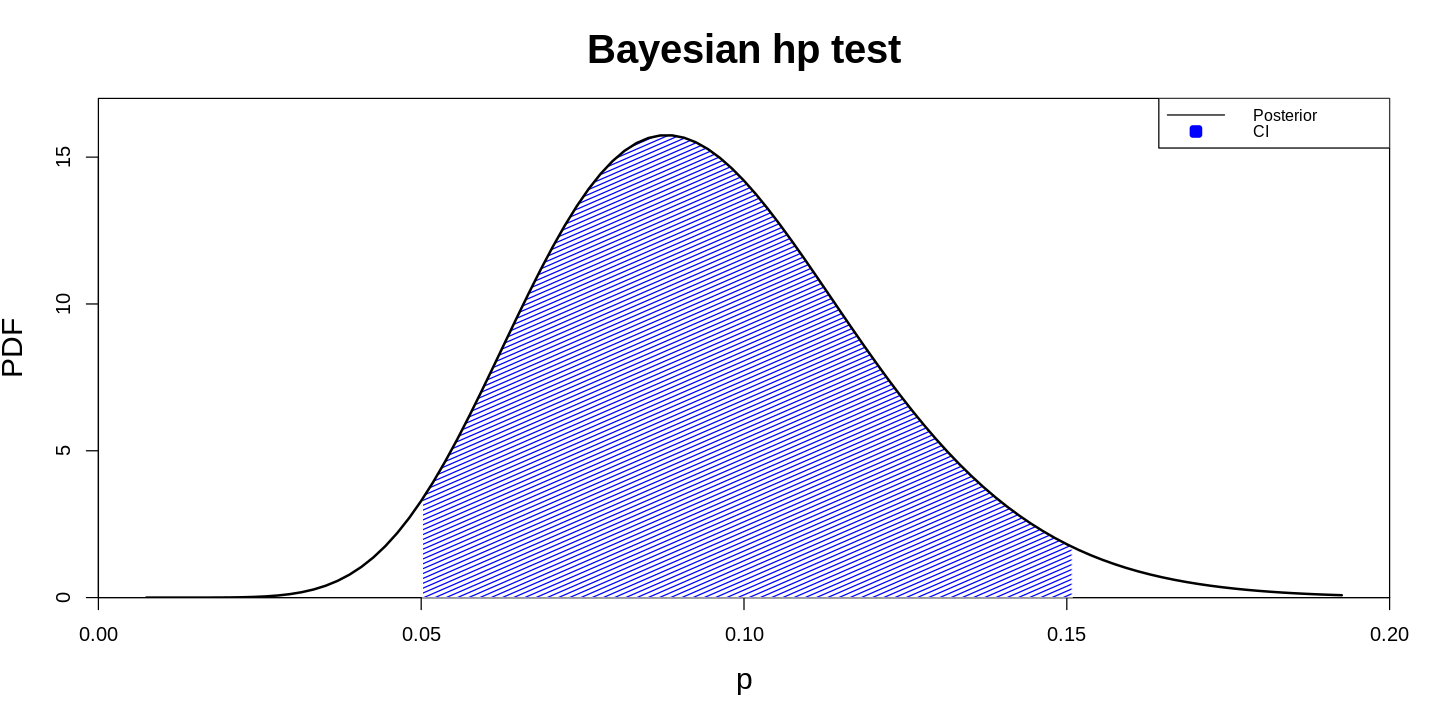

In [9]:
borders <- seq(CI_left, CI_right, len=116)
posterior <- function(p) {
    posterior <- dbeta(p, alpha_posterior, beta_posterior)
    return(posterior)
}
plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.2), ylim = c(0,17), ylab = 'PDF', xlab = 'p',
        main = 'Bayesian hp test', cex.lab = 1.5, cex.main = 2, col = 1, type = 'l', lty = 2, lwd = 3)
polygon(c(borders, CI_right, CI_left), density = 30,
        c(dbeta(borders,alpha_posterior,beta_posterior), 0, 0), col = 4, border = 0)
curve(posterior(x), col = 1, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Posterior', "CI"),
        col = c(1, 4), lty = c(1, NA), lwd = c(1, 5),
        pch = c(NA, 22), cex = .8)
cat("Considering a 2 tail test, it appears that p = 0.1 is inside the 95% credibility interval. \nThe null hypothesis can not be rejected at this level of significance.")


	Exact binomial test

data:  11 and 116
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


11 is well inside the confidence interval, so the null hypothesis is accepted.

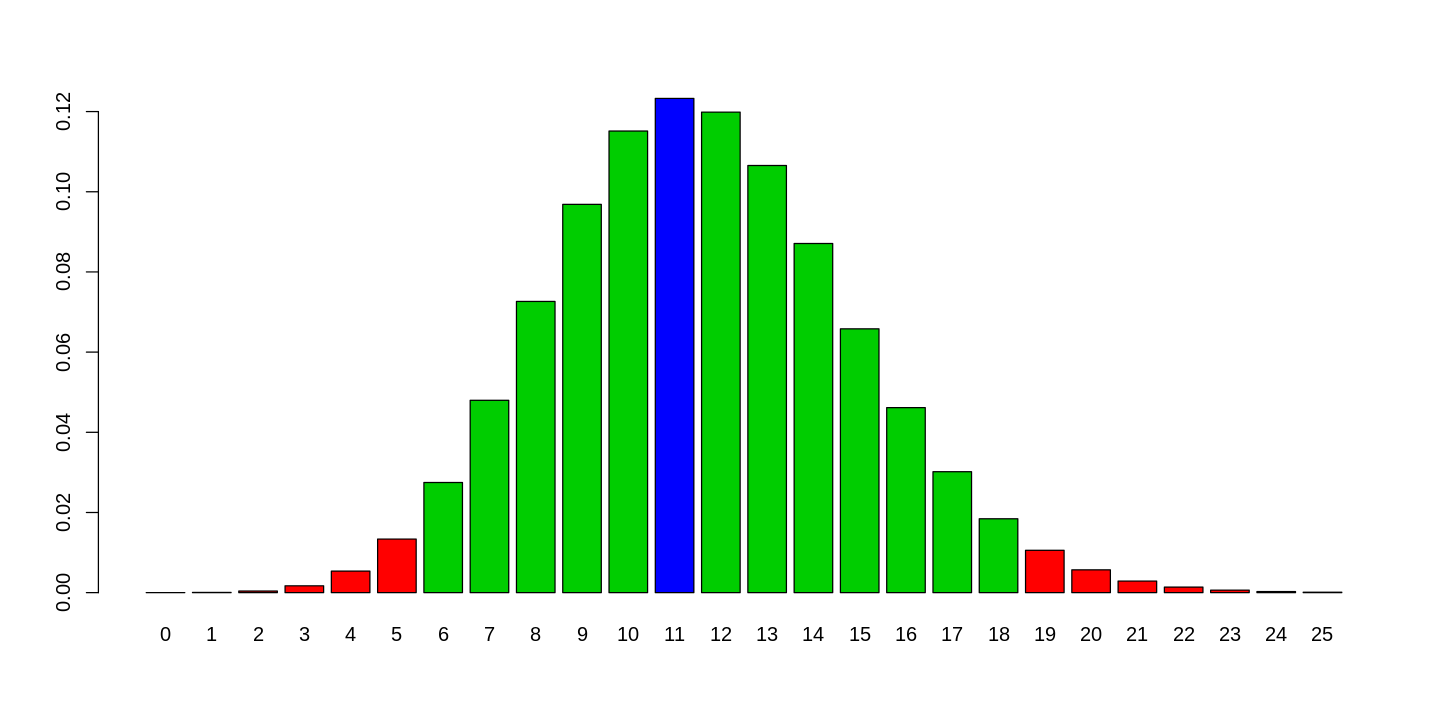

In [10]:
# Doing the binomial test
binom.test(x = 11, n = 116, p = 0.1)
col <- c(rep(2, 6), rep(3, 5), 4, rep(3, 7))
barplot(dbinom(0:25, size = 116, prob= 0.1), names.arg = 0:25, col = col)
cat("11 is well inside the confidence interval, so the null hypothesis is accepted.")

### e)

The study treats a binomial probability distribution. The frequentist estimator is  $y / n = 9 / 165 = 5.5$%.

### f)

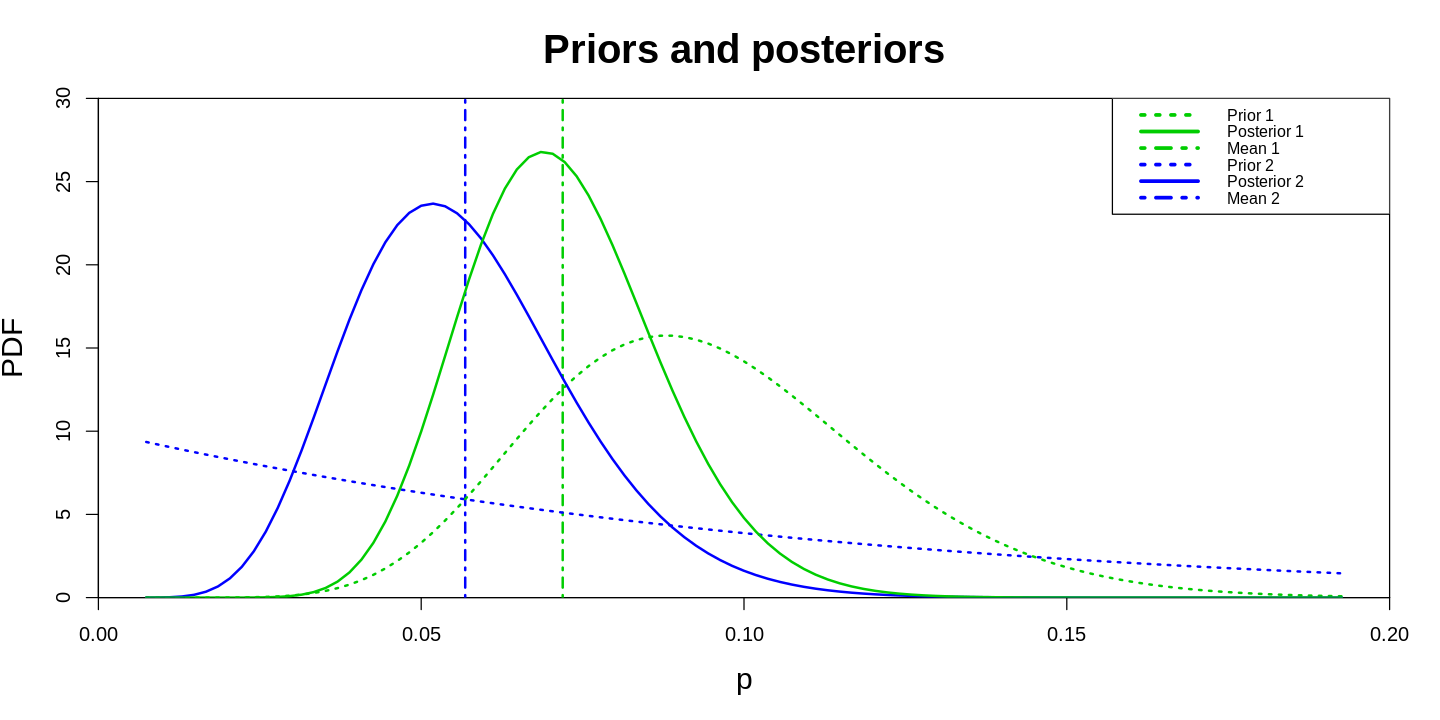

In [11]:
# Computing the posterior from the prior and the experimental results
alpha_prior1 <- 1
beta_prior1 <- 10
alpha_prior2 <- 12
beta_prior2 <- 115
n <- 165
y <- 9
alpha_posterior1 <- alpha_prior1 + y
beta_posterior1 <- beta_prior1 + n - y
alpha_posterior2 <- alpha_prior2 + y
beta_posterior2 <- beta_prior2 + n - y
mean_posterior1 <- alpha_posterior1 / (alpha_posterior1 + beta_posterior1)
sigma_posterior1 <- sqrt((alpha_posterior1 * beta_posterior1) / ((alpha_posterior1 + beta_posterior1 + 1) * (alpha_posterior1 + beta_posterior1)**2))
mean_posterior2 <- alpha_posterior2 / (alpha_posterior2 + beta_posterior2)
sigma_posterior2 <- sqrt((alpha_posterior2 * beta_posterior2) / ((alpha_posterior2 + beta_posterior2 + 1) * (alpha_posterior2 + beta_posterior2)**2))

# Frequentist estimator
frequentist_estimator <- y / n

fig(12, 6)
prior1 <- function(p) {
    prior1 <- dbeta(p,alpha_prior1,beta_prior1)
    return(prior1)
}
prior2 <- function(p) {
    prior2 <- dbeta(p,alpha_prior2,beta_prior2)
    return(prior2)
}
posterior1 <- function(p) {
    posterior1 <- dbeta(p,alpha_posterior1,beta_posterior1)
    return(posterior1)
}
posterior2 <- function(p) {
    posterior2 <- dbeta(p,alpha_posterior2,beta_posterior2)
    return(posterior2)
}

plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.2), ylim = c(0,30), ylab = 'PDF', xlab = 'p', main = 'Priors and posteriors',
        cex.lab = 1.5, cex.main = 2, col = 'navy', type = 'l', lty = 2, lwd = 3)
abline(v = mean_posterior1, lty = 4, lwd = 2, col = 4)
abline(v = mean_posterior2, lty = 4, lwd = 2, col = 3)
curve(prior1(x), col = 4, lwd = 2, lty = 3, add = TRUE)
curve(prior2(x), col = 3, lwd = 2, lty = 3, add = TRUE)
curve(posterior1(x), col = 4, lwd = 2, lty = 1, add = TRUE)
curve(posterior2(x), col = 3, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Prior 1','Posterior 1','Mean 1','Prior 2','Posterior 2', 'Mean 2'),
        col = c(3, 3, 3, 4, 4, 4), lty = c(3, 1, 4, 3, 1, 4), lwd = c(3, 3, 3, 3, 3, 3), cex = .8)

### g)

In [12]:
CI_left1 <- qbeta(0.025, alpha_posterior1, beta_posterior1)
CI_left2 <- qbeta(0.025, alpha_posterior2, beta_posterior2)
CI_right1 <- qbeta(0.975, alpha_posterior1, beta_posterior1)
CI_right2 <- qbeta(0.975, alpha_posterior2, beta_posterior2)

cat(sprintf('Bayesian estimator - model 1:\t\t%.2f%% \t\t\t sigma - model 1:\t%.2f%%.', mean_posterior1 * 100, sigma_posterior1 * 100))
cat(sprintf('\nBayesian estimator - model 2:\t\t%.2f%% \t\t\t sigma - model 2:\t%.2f%%.', mean_posterior2 * 100, sigma_posterior2 * 100))
cat(sprintf('\nCredibility interval - model 1:\t\t[%.2f%%,%.2f%%]', CI_left1 * 100, CI_right1 * 100))
cat(sprintf('\nCredibility interval - model 2:\t\t[%.2f%%,%.2f%%]', CI_left2 * 100, CI_right2 * 100))


Bayesian estimator - model 1:		5.68% 			 sigma - model 1:	1.74%.
Bayesian estimator - model 2:		7.19% 			 sigma - model 2:	1.51%.
Credibility interval - model 1:		[2.77%,9.54%]
Credibility interval - model 2:		[4.52%,10.42%]

### h)

p = 0.1 is outside the credibililty interval. The null hypothesis can be rejected.

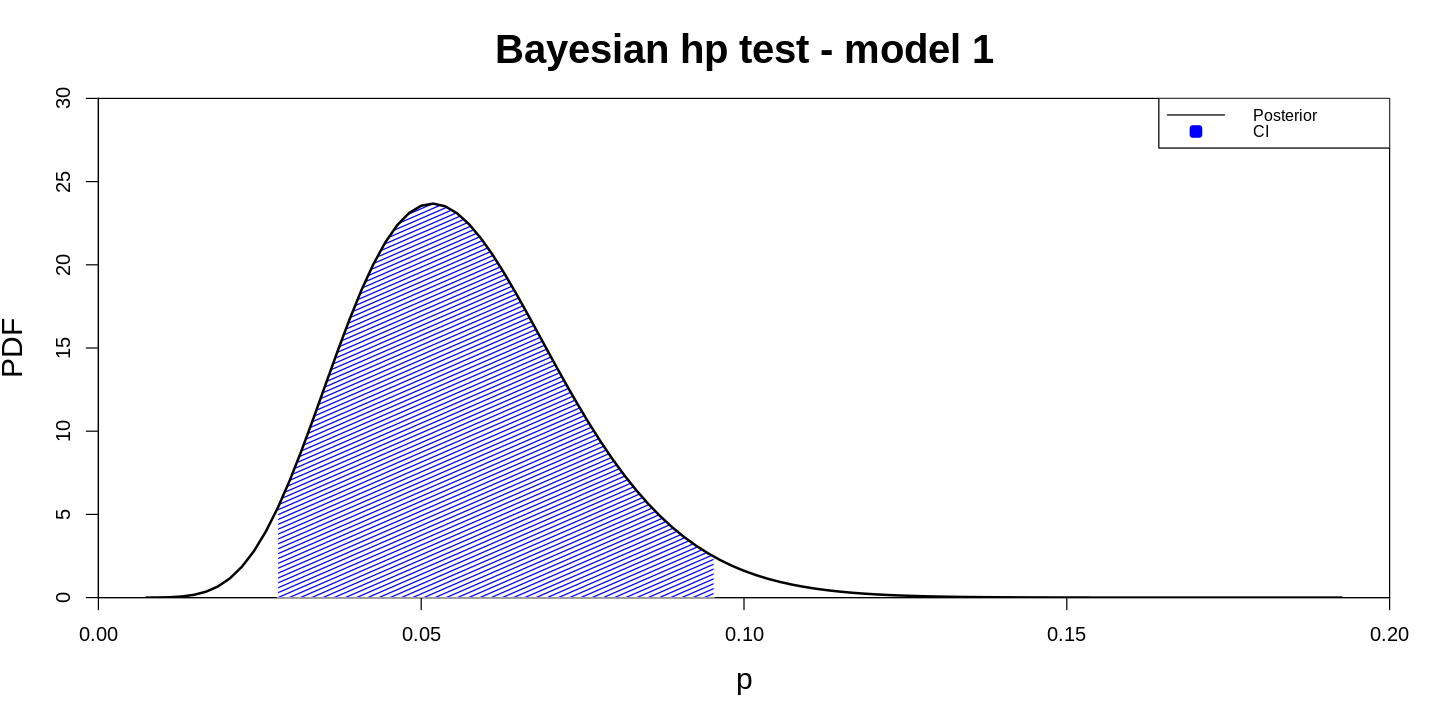

In [13]:
borders1 <- seq(CI_left1, CI_right1, len=165)
posterior1 <- function(p) {
    posterior1 <- dbeta(p,alpha_posterior1,beta_posterior1)
    return(posterior1)
}

plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.2), ylim = c(0,30), ylab = 'PDF', xlab = 'p',
        main = 'Bayesian hp test - model 1', cex.lab = 1.5, cex.main = 2, col = 1, type = 'l', lty = 2, lwd = 3)
polygon(c(borders1, CI_right1, CI_left1), density = 30,
        c(dbeta(borders1, alpha_posterior1, beta_posterior1), 0, 0), col = 4, border = 0)
curve(posterior1(x), col = 1, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Posterior',"CI"),
        col = c(1, 4), lty = c(1, NA), lwd = c(1, 5),
        pch = c(NA, 22), cex = .8)
cat("p = 0.1 is outside the credibililty interval. The null hypothesis can be rejected.")


p = 0.1 is inside the credibililty interval. The null hypothesis is accepted.

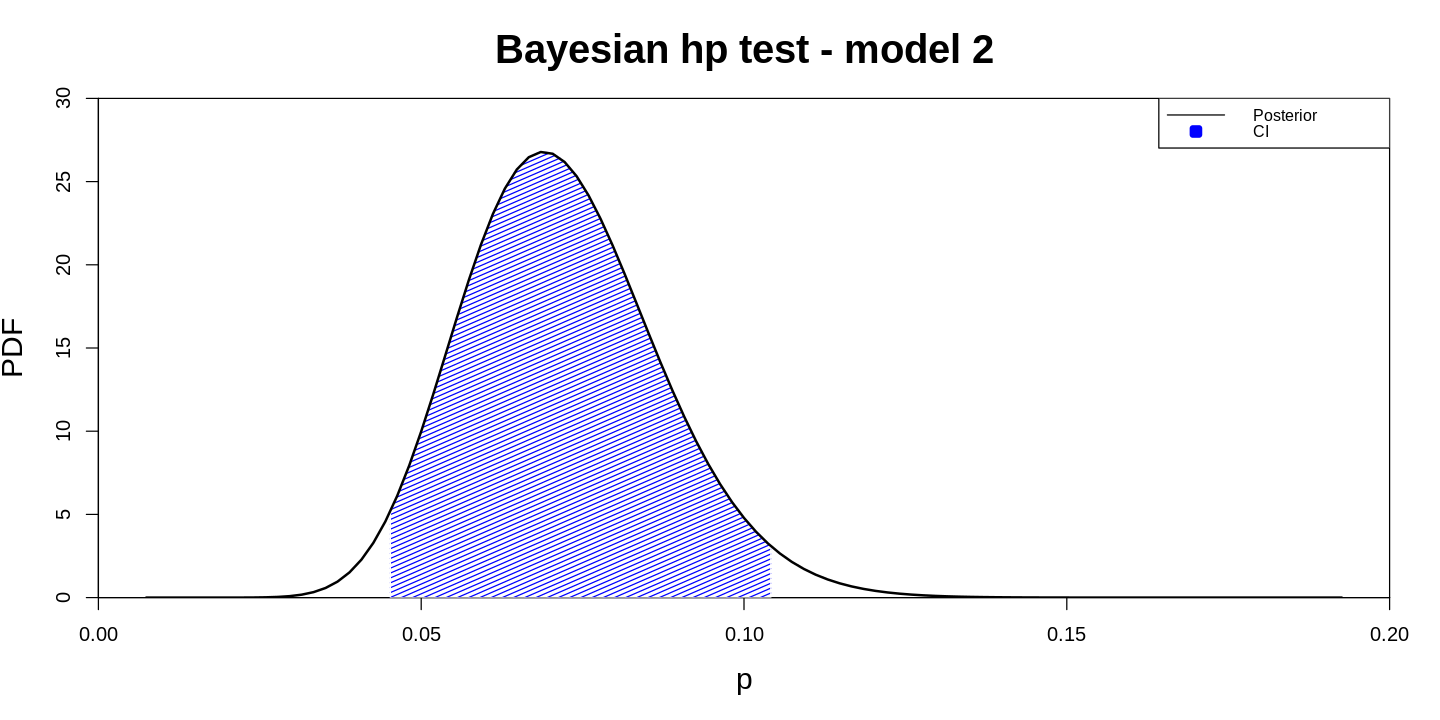

In [14]:
borders2 <- seq(CI_left2,CI_right2,len=201)
posterior2 <- function(p) {
    posterior2 <- dbeta(p,alpha_posterior2,beta_posterior2)
    return(posterior2)
}

plot(0, 0, xaxs = 'i', yaxs = 'i', xlim = c(0, 0.2), ylim = c(0,30), ylab = 'PDF', xlab = 'p',
        main = 'Bayesian hp test - model 2', cex.lab = 1.5, cex.main = 2, col = 1, type = 'l', lty = 2, lwd = 3)
polygon(c(borders2, CI_right2, CI_left2), density = 30,
        c(dbeta(borders2, alpha_posterior2, beta_posterior2), 0, 0), col = 4, border = 0)
curve(posterior2(x), col = 1, lwd = 2, lty = 1, add = TRUE)
legend('topright', c('Posterior',"CI"),
        col = c(1, 4), lty = c(1, NA), lwd = c(1, 5),
        pch = c(NA, 22), cex = .8)
cat("p = 0.1 is inside the credibililty interval. The null hypothesis is accepted.")



	Exact binomial test

data:  9 and 165
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


The region to select for the confidence interval depends on an arbitrary chioce of bins, due to the fact that it is a discrete distribution. 
Different chioces, approximating to 5% by defect or excess, lead to a different result.
Excess approximation:	 alpha =  0.03656096 
	 with p = 0.1 being inside the interval
Defect approximation:	 alpha =  0.0511155 
	 with p = 0.1 being outside the interval
Since the second case comes closer to the alpha = 5%, it seems acceptable to choose that option. So, the null hypothesis is rejected

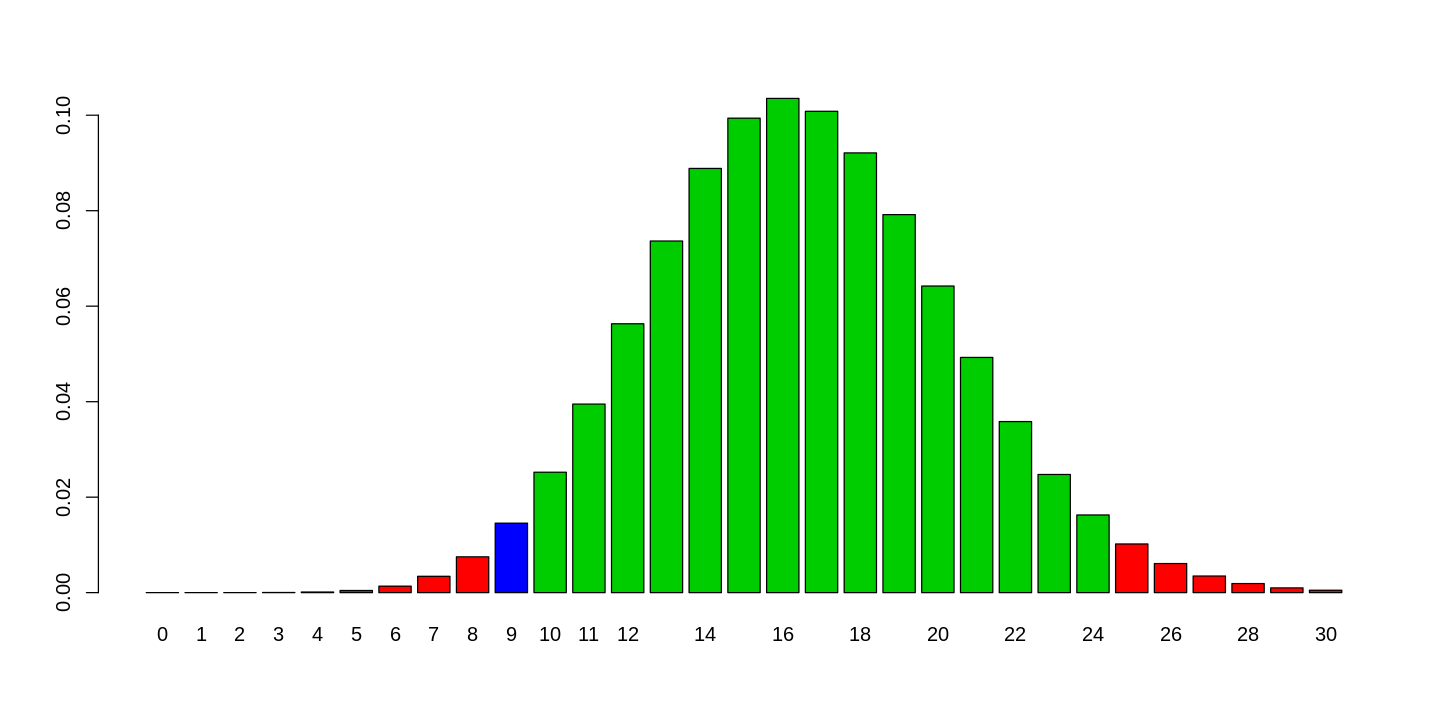

In [15]:
col = c(rep(2, 9), 4, rep(3, 15))
barplot(dbinom(0:30, size = 165, p= 0.1), names.arg=0:30, col = col)
binom.test(x = 9, n = 165, p = 0.1)

cat("The region to select for the confidence interval depends on an arbitrary chioce of bins, due to the fact that it is a discrete distribution. \nDifferent chioces, approximating to 5% by defect or excess, lead to a different result.")
cat("\nExcess approximation:\t alpha = ", 1 - sum(dbinom(9:24, size = 165, p = 0.1)), "\n\t with p = 0.1 being inside the interval")
cat("\nDefect approximation:\t alpha = ", 1 - sum(dbinom(10:24, size = 165, p = 0.1)), "\n\t with p = 0.1 being outside the interval")
cat("\nSince the second case comes closer to the alpha = 5%, it seems acceptable to choose that option. So, the null hypothesis is rejected")

## Exercise 4
    Analyze the data of Exercise 1 using a MCMC with JAGS (solve only point a of Ex 1)


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0850857      0.0309786      0.0003098      0.0004212 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03447 0.06257 0.08167 0.10413 0.15529 



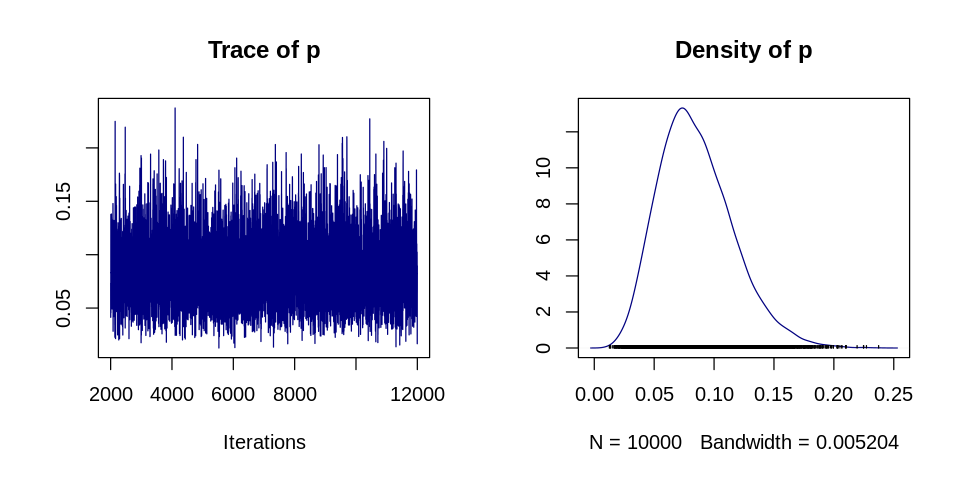

In [16]:
# (The analysis is on point c instead of point a)

# model data
mean_prior <- 0.15
sigma_prior <- 0.14
alpha_prior <- (((1 - mean_prior) / (sigma_prior**2)) - (1 / mean_prior)) * mean_prior**2
beta_prior <- alpha_prior * ( (1 / mean_prior) - 1)
y <- 6
n <- 75

data4 <- NULL
data4$a_prior <- alpha_prior
data4$b_prior <- beta_prior
data4$X <- y
data4$n <- n

# jags model: the results asked are directly readable from the summary
jm_n1_unif <- jags.model("model_bb.bug", data4, n.adapt = 1000, quiet = TRUE)
update(jm_n1_unif, 1000, progress.bar = "none")
chain4 <- coda.samples(jm_n1_unif, c("p"), n.iter = 10000, progress.bar = "none")
print(summary(chain4))
fig(8, 4)
plot(chain4, col = "navy")

Comparing with exercise 1:

|  | analytic bayesian | MCMC |
| --: | :-: | :-: |
| best est | 0.08 | 0.08 |
| sigma | 0.03 | 0.03 |

## Exercise 5
    Analyze the data of Exercise 2 using a MCMC with JAGS

In [17]:
# Model data for all the 4 combinations of the 2 corps and the 2 priors

n1 <- c(rep(0, 109), rep(1, 65), rep(2, 22), rep(3, 3), rep(4, 1))
n2 <- c(rep(0, 144), rep(1, 91), rep(2, 32), rep(3, 11), rep(4, 2))

a_prior_unif <- 1
b_prior_unif <- 1e-10
a_prior_jeff <- 0.5
b_prior_jeff <- 1e-10


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6146491      0.0554818      0.0005548      0.0005548 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5097 0.5763 0.6126 0.6518 0.7280 



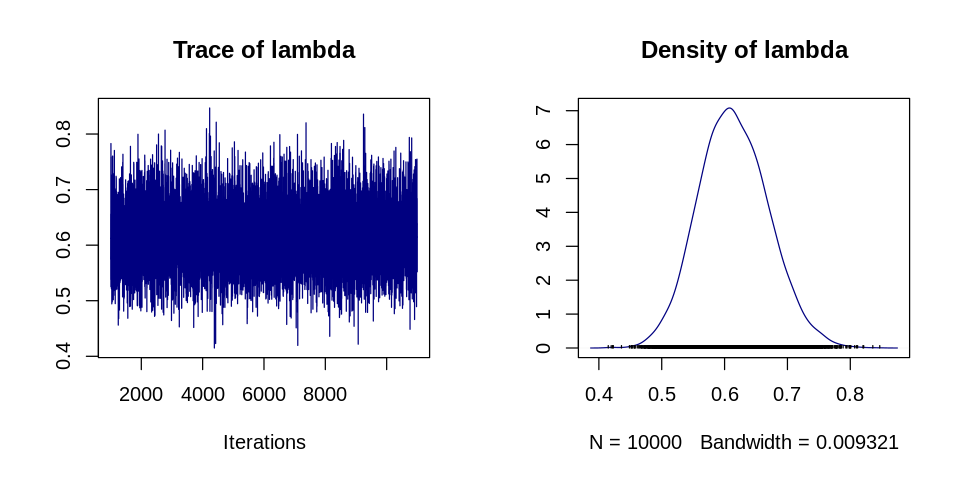

In [18]:
# case I: 1st corp, uniform prior

data_n1_unif <- NULL
data_n1_unif$X <- n1
data_n1_unif$a_prior <- a_prior_unif
data_n1_unif$b_prior <- b_prior_unif

jm_n1_unif <- jags.model("model_gp.bug", data_n1_unif, n.adapt = 1000, quiet = TRUE)#n.adapt = 1000,
update(jm_n1_unif, 1000, progress.bar = "none")
chain_n1_unif <- coda.samples(jm_n1_unif, c("lambda"), n.iter = 10000, progress.bar="none")

print(summary(chain_n1_unif))

plot(chain_n1_unif, col = "navy")


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.7036216      0.0498560      0.0004986      0.0004986 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6091 0.6696 0.7025 0.7364 0.8059 



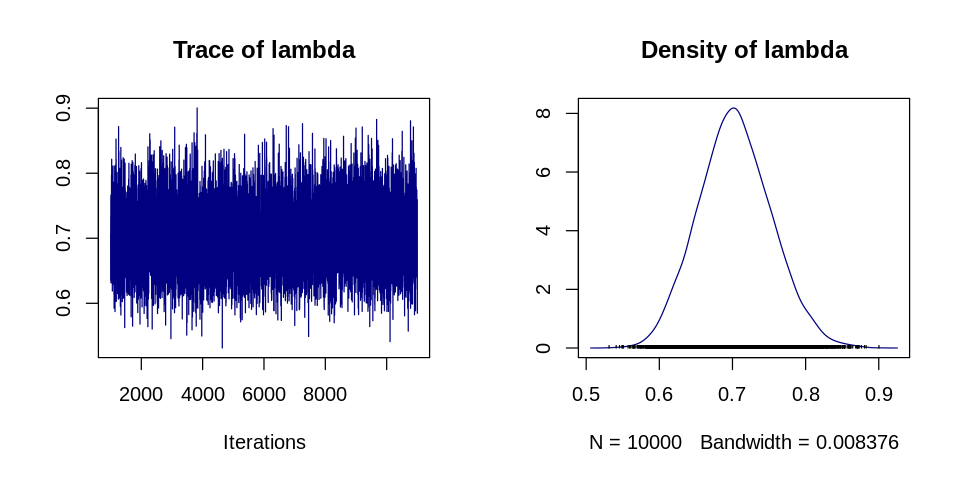

In [19]:
# case II: 2nd corp, uniform prior

data_n2_unif <- NULL
data_n2_unif$X <- n2
data_n2_unif$a_prior <- a_prior_unif
data_n2_unif$b_prior <- b_prior_unif

jm_n2_unif <- jags.model("model_gp.bug", data_n2_unif, n.adapt = 1000, quiet = TRUE)
update(jm_n2_unif, 1000, progress.bar = "none")
chain_n2_unif <- coda.samples(jm_n2_unif, c("lambda"), n.iter = 10000, progress.bar = "none")

print(summary(chain_n2_unif))

plot(chain_n2_unif, col = "navy")


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6125705      0.0554163      0.0005542      0.0005542 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5095 0.5743 0.6108 0.6492 0.7253 



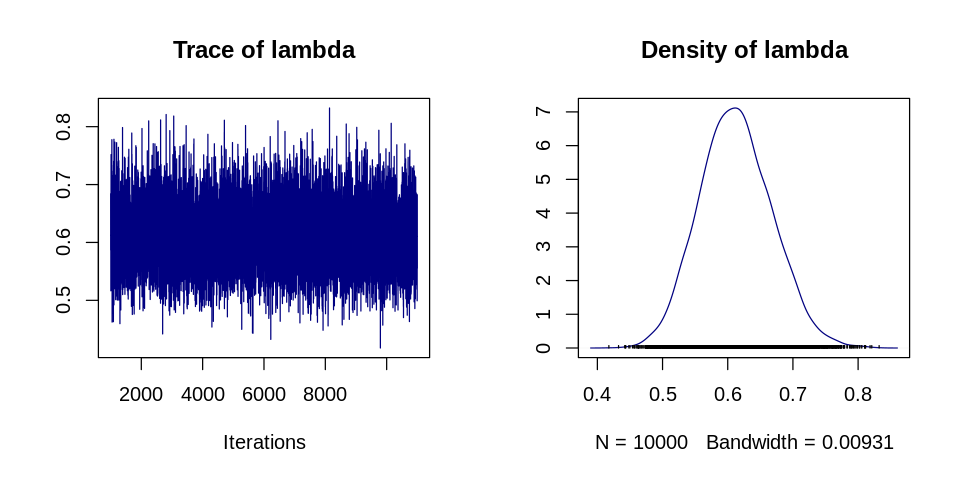

In [20]:
# case III: 1st corp, Jeffrey prior

data_n1_jeff <- NULL
data_n1_jeff$X <- n1
data_n1_jeff$a_prior <- a_prior_jeff
data_n1_jeff$b_prior <- b_prior_jeff

jm_n1_jeff <- jags.model("model_gp.bug", data_n1_jeff, n.adapt = 1000, quiet = TRUE)
update(jm_n1_jeff, 1000, progress.bar = "none")
chain_n1_jeff <- coda.samples(jm_n1_jeff, c("lambda"), n.iter = 10000, progress.bar = "none")

print(summary(chain_n1_jeff))

plot(chain_n1_jeff, col = "navy")


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.701878       0.050395       0.000504       0.000504 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.6062 0.6676 0.7004 0.7350 0.8061 



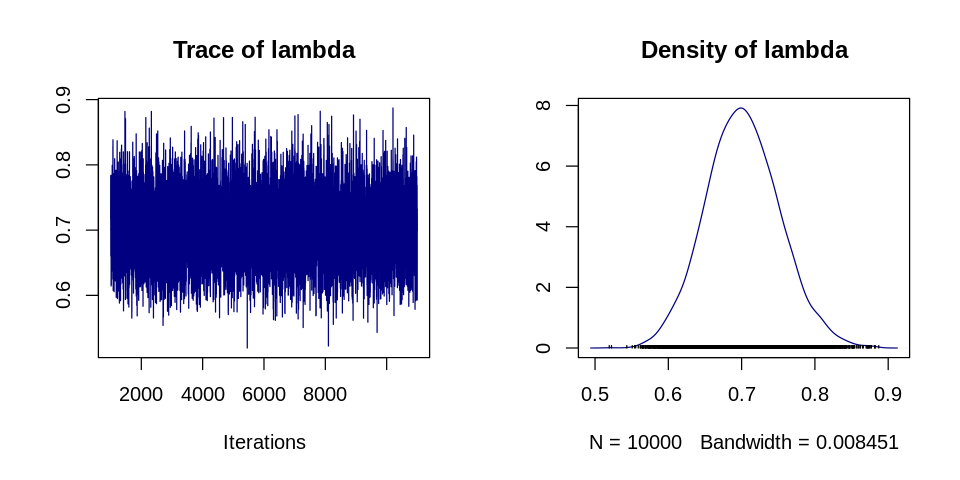

In [21]:
# case IV: 2nd corp, Jeffrey prior

data_n2_jeff <- NULL
data_n2_jeff$X <- n2
data_n2_jeff$a_prior <- a_prior_jeff
data_n2_jeff$b_prior <- b_prior_jeff

jm_n2_jeff <- jags.model("model_gp.bug", data_n2_jeff, n.adapt = 1000, quiet = TRUE)
update(jm_n2_jeff, 1000, progress.bar = "none")
chain_n2_jeff <- coda.samples(jm_n2_jeff, c("lambda"), n.iter = 10000, progress.bar = "none")

print(summary(chain_n2_jeff))

plot(chain_n2_jeff, col = "navy")

## Exercise 6
    Analyze the data of Exercise 3 using a MCMC with JAGS (solve point b and c)


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0945008      0.0260757      0.0002608      0.0003613 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05002 0.07578 0.09228 0.11037 0.15234 



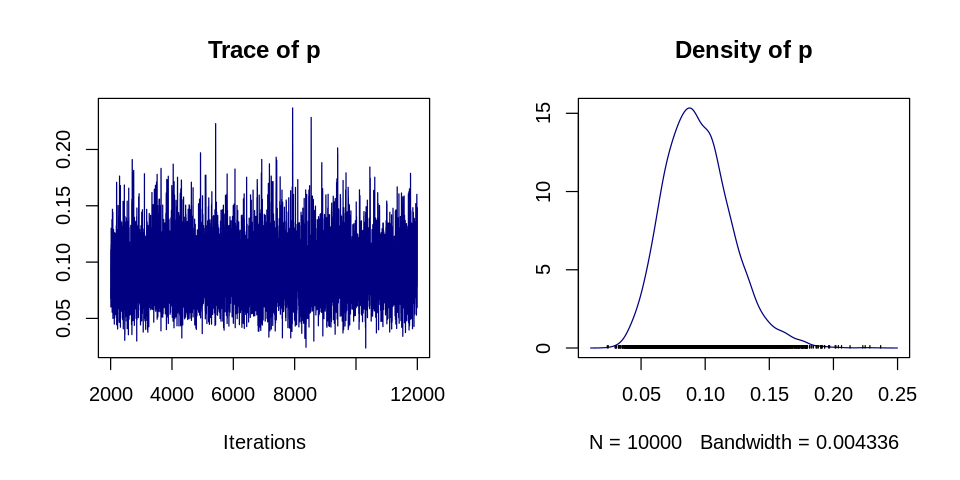

In [22]:
# model data
a_prior_beta <- 1
b_prior_beta <- 10
y <- 11
n <- 116

data <- NULL
data$a_prior <- a_prior_beta
data$b_prior <- b_prior_beta
data$X <- y
data$n <- n

# jags model
jm <- jags.model("model_bb.bug", data, n.adapt = 1000, quiet = TRUE)
update(jm, 1000, progress.bar = "none")
chain <- coda.samples(jm, c("p"), n.iter = 10000, progress.bar = "none")

print(summary(chain))

plot(chain, col = "navy")

Comparing with the results of exercise 3:

|  | analytic bayesian | MCMC |
| --: | :-: | :-: |
| best est | 0.09 | 0.09 |
| sigma | 0.03 | 0.03 |
| 95% credible interval | [0.05, 0.15] | [0.05, 0.15] |